<a href="https://colab.research.google.com/github/amgito1648/clase-inteligencia-artificial/blob/main/Fundamento_Cuaderno_22_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¿Qué es t-SNE?

t-SNE (t-Distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad no lineal, que se utiliza principalmente para la visualización de datos de alta dimensión. La principal característica de t-SNE es que mantiene la proximidad entre las muestras en un espacio de alta dimensión cuando las proyecta en un espacio de menor dimensión (por lo general, en 2D o 3D).

t-SNE trabaja transformando las similitudes en un espacio de alta dimensión en probabilidades de distribución, y luego minimizando la diferencia entre las distribuciones en el espacio de baja dimensión.

En pocas palabras, t-SNE intenta mantener las relaciones locales entre las muestras cuando las reduce a un espacio de menor dimensión.



**Parámetros clave de t-SNE**

    n_components: Especifica el número de dimensiones al que se reducirá el conjunto de datos (comúnmente 2 o 3 para visualización).
    perplexity: Controla el equilibrio entre la preservación de las distancias locales y globales. Un valor más bajo tiende a concentrarse más en las relaciones locales, mientras que un valor más alto lo hace en las relaciones globales.
    learning_rate: Controla la velocidad con la que el algoritmo converge.
    n_iter: Número de iteraciones que el algoritmo realizará para encontrar una solución.

**Ejemplo con parámetros ajustados:**

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

**¿Cuándo usar t-SNE?**

* Visualización de datos de alta dimensión:
        t-SNE es especialmente útil cuando tienes un conjunto de datos con muchas dimensiones (por ejemplo, más de 10 o 100 características) y deseas visualizar cómo se agrupan los datos en un espacio 2D o 3D.
        Puede ayudarte a descubrir patrones ocultos, como grupos o clusters en los datos, que pueden no ser fácilmente detectables en el espacio de alta dimensión.

*  Exploración de datos:
        Es útil para obtener una visión general de cómo se distribuyen los puntos de datos y si existen estructuras subyacentes (clusters, anomalías, etc.).
        Es común usar t-SNE en análisis exploratorio de datos (EDA).

*  Análisis de clusters:
        Si tienes datos con etiquetas de clusters (por ejemplo, después de aplicar un algoritmo de clustering como K-means), puedes usar t-SNE para visualizar cómo se distribuyen esos clusters en un espacio de menor dimensión.

  No es adecuado para la reducción de dimensionalidad para modelos predictivos:
  
  t-SNE no debe utilizarse para reducción de dimensionalidad en modelos predictivos. A diferencia de otras técnicas como PCA, que conserva la varianza en los datos, t-SNE no está diseñado para ser utilizado como un paso previo en un pipeline de clasificación o regresión.



##Importar las bibliotecas necesarias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Cargar datos
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Churn_Modelling.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas de los datos
data.head()



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,2,15647311,Hill,608,Spain,NaN,41.0,1,83807.86,25,0,1,112542.58,0
3,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,5
CreditScore,0
Geography,0
Gender,1
Age,5
Tenure,0
Balance,0
NumOfProducts,0


##Preparar los datos

In [ ]:
from sklearn.impute import SimpleImputer

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = imputer.fit_transform(data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                                           'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']])

# Convertir los datos imputados en un DataFrame
X_imputed = pd.DataFrame(data_imputed, columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
                                                'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [ ]:
# Codificar variables categóricas
le_geo = LabelEncoder()
X_imputed['Geography'] = le_geo.fit_transform(X_imputed['Geography'])

le_gender = LabelEncoder()
X_imputed['Gender'] = le_gender.fit_transform(X_imputed['Gender'])



# Seleccionar características relevantes
X = X_imputed[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
          'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]

# Seleccionar la variable objetivo
y = data['Exited']

##Escalar los datos

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



##Aplicar t-SNE

El siguiente paso es aplicar t-SNE para reducir los datos a 2 o 3 dimensiones, que es lo que normalmente queremos para la visualización.

In [ ]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

##Visualizar los resultados

Una vez que los datos han sido proyectados en 2 dimensiones, se pueden visualizar con una gráfica de dispersión:

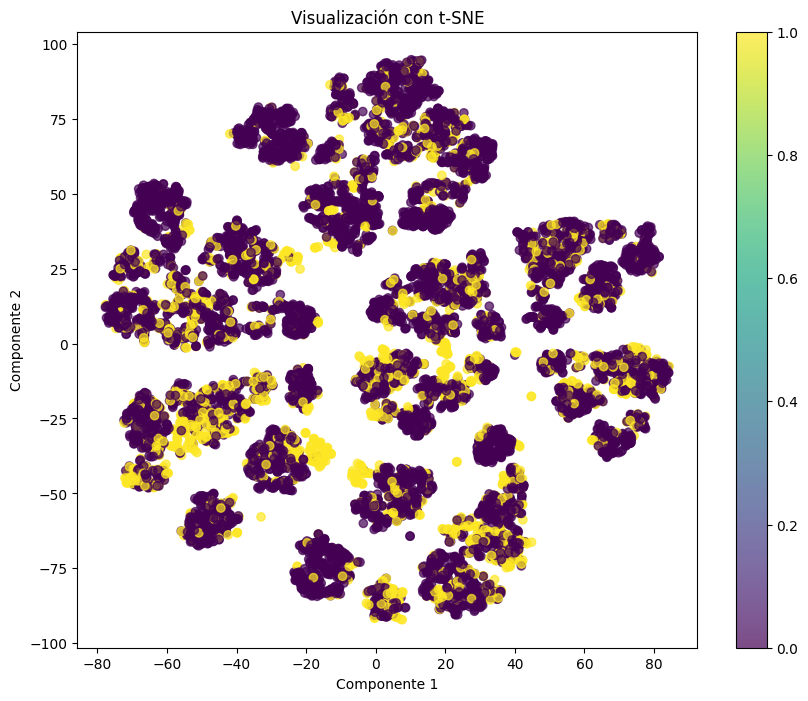

In [ ]:
# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title("Visualización con t-SNE")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

## **Ventajas de t-SNE**

**Preserva las relaciones locales:** Es excelente para capturar las relaciones entre los puntos que están cerca entre sí.

**Visualización intuitiva:** Permite representar visualmente datos de alta dimensión en un espacio de 2D o 3D, lo que facilita la interpretación y el análisis visual.

## **Desventajas de t-SNE**

**No lineal:** t-SNE no es un método lineal, por lo que no es adecuado para la reducción de dimensionalidad de datos que requieren mantener una estructura lineal.

Aunque t-SNE es excelente para visualización en 2D o 3D, se vuelve menos útil cuando se aplica a datos de alta dimensión debido a la dificultad de interpretación.

**Alta complejidad computacional:** t-SNE es computacionalmente costoso, especialmente con grandes conjuntos de datos.
    No es adecuado para datos muy grandes: Con grandes volúmenes de datos, t-SNE puede ser muy lento. En estos casos, puede ser útil usar una versión optimizada como Barnes-Hut t-SNE o FFT-accelerated t-SNE.

## **Resumen**

t-SNE es una técnica de reducción de dimensionalidad no lineal utilizada principalmente para visualización de datos de alta dimensión.
  
Su propósito es proyectar los datos a 2D o 3D, mientras preserva las relaciones locales entre los puntos, lo que facilita la identificación de patrones y estructuras subyacentes.
  
Se usa cuando se necesita visualizar datos de alta dimensión y explorar posibles clusters o patrones.

Reitero que complejo interpretar cuando se aplica a datos de alta dimensión.